In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import t
import fiona
import geopandas as gpd
import folium

## Reading the datasets
_______________________
These part of code only read and skim about the info contained in the datasets provided and external info

In [2]:
pd.set_option('float_format', '{:.3f}'.format)

In [3]:
cab_data_df = pd.read_csv("../data/Cab_Data.csv")
print(cab_data_df.shape)
display(cab_data_df.head(), cab_data_df.info())

(359392, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA        30.450   
1        10000012           42375  Pink Cab  ATLANTA GA        28.620   
2        10000013           42371  Pink Cab  ATLANTA GA         9.040   
3        10000014           42376  Pink Cab  ATLANTA GA        33.170   
4        10000015           42372  Pink Cab  ATLANTA GA         8.730   

   Price Charged  Cost of Trip  
0        370.950       313.635  
1        358.520       334.854  
2        125.200        97.632  
3        377.400       351.602  
4        114.620        97.776

None

The date is formated in Excel and its origin is in December 30, 1899. We must transform this column to datetime

In [4]:
cab_data_df["Date of Travel"] = pd.to_datetime(cab_data_df["Date of Travel"], unit='D', origin='1899-12-30')
display(cab_data_df.head(), cab_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA        30.450   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA        28.620   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA         9.040   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA        33.170   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA         8.730   

   Price Charged  Cost of Trip  
0        370.950       313.635  
1        358.520       334.854  
2        125.200        97.632  
3        377.400       351.602  
4        114.620        97.776

None

In [5]:
city_df = pd.read_csv("../data/City.csv", thousands=',')
print(city_df.shape)
display(city_df, city_df.info())

(20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021

None

In [6]:
## This data was handled with QGIS.

city_gdf = gpd.read_file('../data/cities_centroids.geojson')
display(city_gdf, city_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   City             20 non-null     object  
 1   City_Population  20 non-null     object  
 2   City_Users       20 non-null     object  
 3   geometry         20 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 768.0+ bytes


City City_Population City_Users                     geometry
0         PHOENIX AZ        943,999      6,133   POINT (-112.07210 33.54259)
1          TUCSON AZ        631,442      5,712   POINT (-110.89236 32.19589)
2     LOS ANGELES CA      1,595,037    144,132   POINT (-118.41211 34.11211)
3      ORANGE COUNTY      1,030,185     12,994   POINT (-117.82489 33.80527)
4     SILICON VALLEY      1,177,609     27,247   POINT (-122.14043 37.39914)
5      SACRAMENTO CA        545,776      7,044   POINT (-121.46843 38.56676)
6       SAN DIEGO CA        959,307     69,995   POINT (-117.13664 32.81500)
7   SAN FRANCISCO CA        629,591    213,609   POINT (-122.43160 37.77196)
8          DENVER CO        754,233     12,421   POINT (-104.87319 39.76802)
9      WASHINGTON DC        418,859    127,001    POINT (-77.01587 38.90516)
10          MIAMI FL      1,339,155     17,675    POINT (-80.21062 25.77604)
11        ATLANTA GA        814,885     24,701    POINT (-84.42252 33.76301)
12        CHICAGO IL      1,955,130    164,468    POINT (-87.68502 41.83708)
13         BOSTON MA        248,968     80,021    POINT (-71.06246 42.35115)
14       NEW YORK NY      8,405,837    302,149    POINT (-73.94343 40.66990)
15     PITTSBURGH PA        542,085      3,643    POINT (-79.97648 40.43928)
16      NASHVILLE TN        327,225      9,270    POINT (-86.78483 36.17161)
17         AUSTIN TX        698,371     14,978    POINT (-97.75081 30.30609)
18         DALLAS TX        942,908     22,157    POINT (-96.76553 32.79428)
19        SEATTLE WA        671,238     25,063   POINT (-122.35156 47.62162)

None

In [7]:
customer_df = pd.read_csv("../data/Customer_ID.csv")
print(customer_df.shape)
display(customer_df.info(), customer_df.head())

(49171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [8]:
transaction_df = pd.read_csv("../data/Transaction_ID.csv")
print(transaction_df.shape)
display(transaction_df.info(), transaction_df.head())

(440098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [11]:
holidays_df = pd.read_csv('../data/US Holiday Dates (2004-2021).csv')
holidays_df = holidays_df[(holidays_df['Year'] >= 2016) & (holidays_df['Year'] <= 2018)]
holidays_df["Date"] = pd.to_datetime(holidays_df["Date"], format='%Y-%m-%d')
holidays_df.reset_index(inplace=True)
holidays_df.drop(columns='index', inplace=True)
print(holidays_df.shape)
display(holidays_df.info(), holidays_df.head())

(57, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     57 non-null     datetime64[ns]
 1   Holiday  57 non-null     object        
 2   WeekDay  57 non-null     object        
 3   Month    57 non-null     int64         
 4   Day      57 non-null     int64         
 5   Year     57 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.8+ KB


None

Date        Holiday    WeekDay  Month  Day  Year
0 2016-07-04    4th of July     Monday      7    4  2016
1 2017-07-04    4th of July    Tuesday      7    4  2017
2 2018-07-04    4th of July  Wednesday      7    4  2018
3 2016-12-25  Christmas Day     Sunday     12   25  2016
4 2017-12-25  Christmas Day     Monday     12   25  2017

## Graphic EDA
--------------

The aim of this part is to find patterns, distributions, and outliers in the dataframes

### Where our analysis is located?

The next interactive map show us where is located the sample of our study

In [167]:
map = folium.Map(location = [38, -93], tiles = "Stamen Terrain", zoom_start = 4)
coordinates_list = [[point.xy[1][0], point.xy[0][0]] for point in city_gdf.geometry]

i=0
for coordinates in coordinates_list:
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "City: " + str(city_gdf.City[i]) + '<br>'
                            "Population: " + str(city_gdf.City_Population[i]) + '<br>'
                            "Cab users: " + str(city_gdf.City_Users[i]) + '<br>'
                            "Coordinates: " + str(coordinates_list[i])))
    i += 1
map

If you don't see an interactive map please go to '../outputs/cities_info.html' file

### Merging the data in a complete dataframe that hold almost all the info

We are going to merge the cab data with the transaction data and the customer data

In [14]:
complete_df = cab_data_df.merge(transaction_df.merge(customer_df, how='left', on='Customer ID'), how='left', on='Transaction ID')
print(complete_df.shape)
display(complete_df.info(), complete_df.head())

(359392, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+

None

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA        30.450   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA        28.620   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA         9.040   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA        33.170   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA         8.730   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0        370.950       313.635        29290         Card   Male   28   
1        358.520       334.854        27703         Card   Male   27   
2        125.200        97.632        28712         Cash   Male   53   
3        377.400       351.602        28020         Cash   Male   23   
4        114.620        97.776        27182         Card   Male   33   

   Income (USD/Month)  
0               10813  
1                9237  
2               11242  
3               23327  
4                8536

In [39]:
complete_df.describe()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
count      359392.000    359392.000     359392.000    359392.000   359392.000   
mean     10220761.185        22.567        423.443       286.190    19191.652   
std        126805.804        12.234        274.379       157.994    21012.412   
min      10000011.000         1.900         15.600        19.000        1.000   
25%      10110809.750        12.000        206.438       151.200     2705.000   
50%      10221035.500        22.440        386.360       282.480     7459.000   
75%      10330937.250        32.960        583.660       413.683    36078.000   
max      10440107.000        48.000       2048.030       691.200    60000.000   

             Age  Income (USD/Month)  
count 359392.000          359392.000  
mean      35.337           15048.823  
std       12.594            7969.409  
min       18.000            2000.000  
25%       25.000            8424.000  
50%       33.000           14685.000  
75%       42.000           21035.000  
max       65.000           35000.000

### Looking for outliers

We will use Letter Value plots to se the distribution of the data

In [16]:
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_palette("colorblind") ## The more people who see clearly these charts the more colaborators will we have

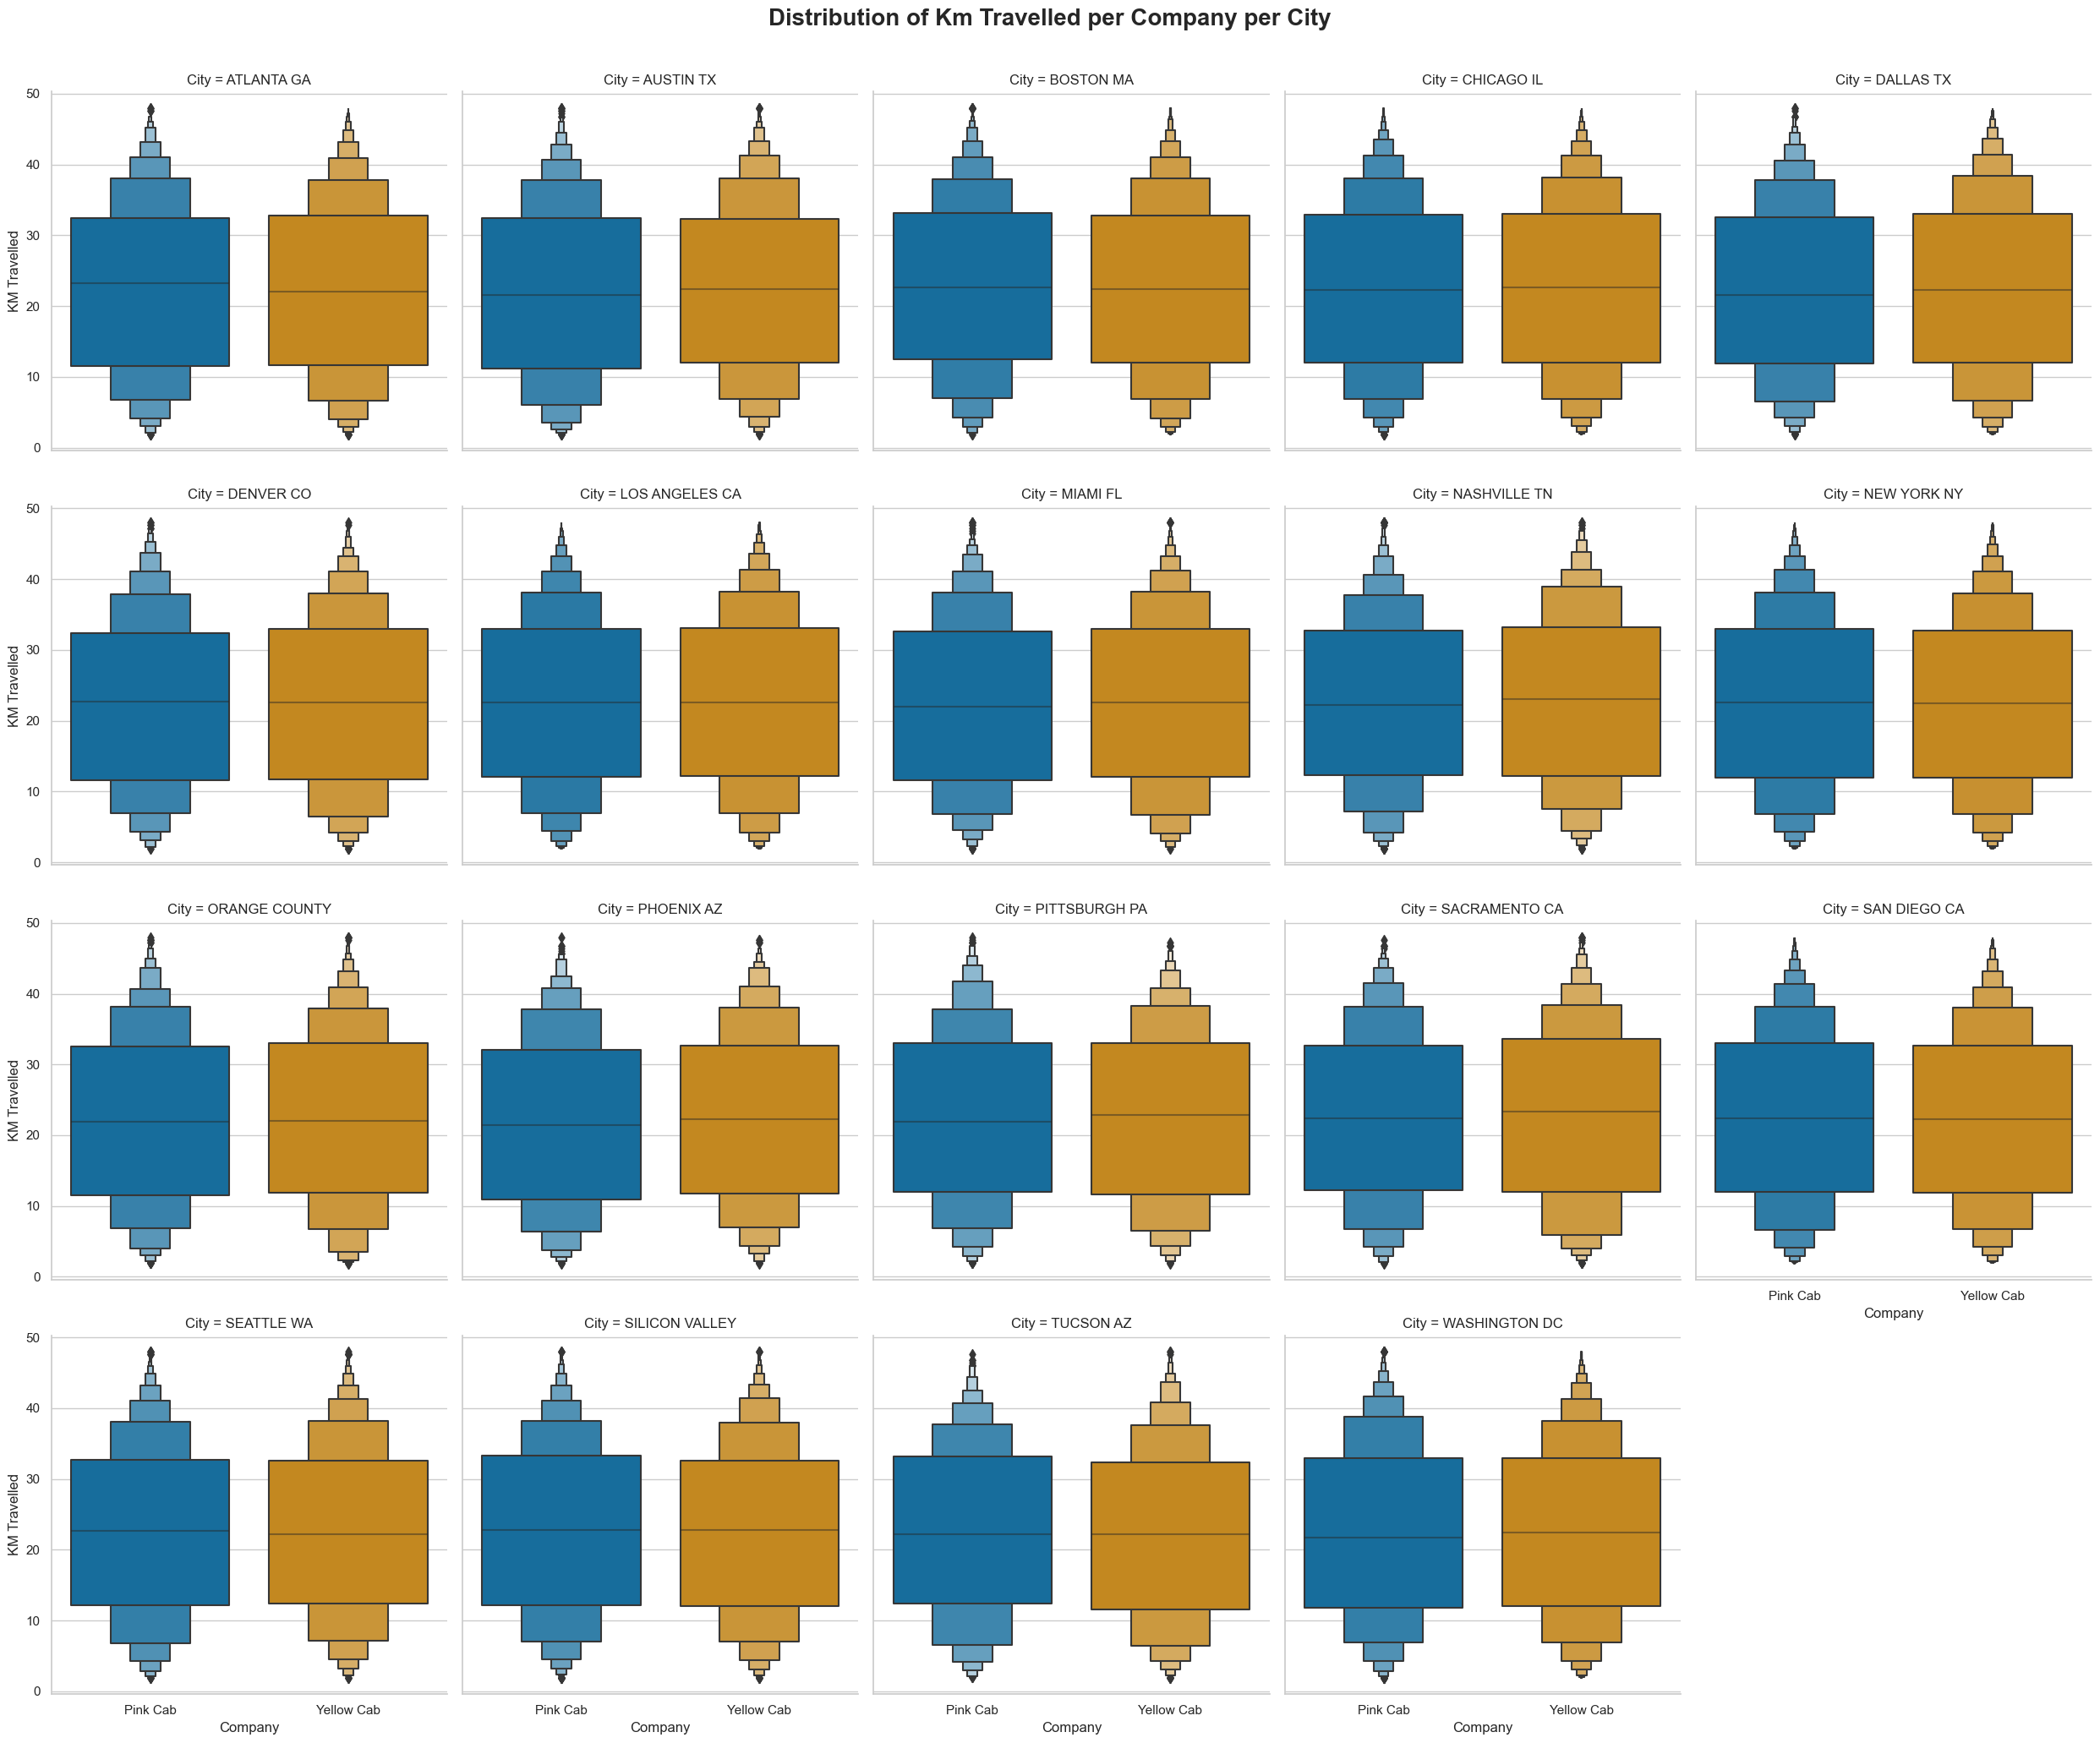

In [62]:
g = sns.catplot(kind='boxen', x='Company', y='KM Travelled', data=complete_df, col='City', col_wrap=5)
g.fig.suptitle("Distribution of Km Travelled per Company per City", y=1.03, fontsize=20, fontweight='bold')
plt.show()

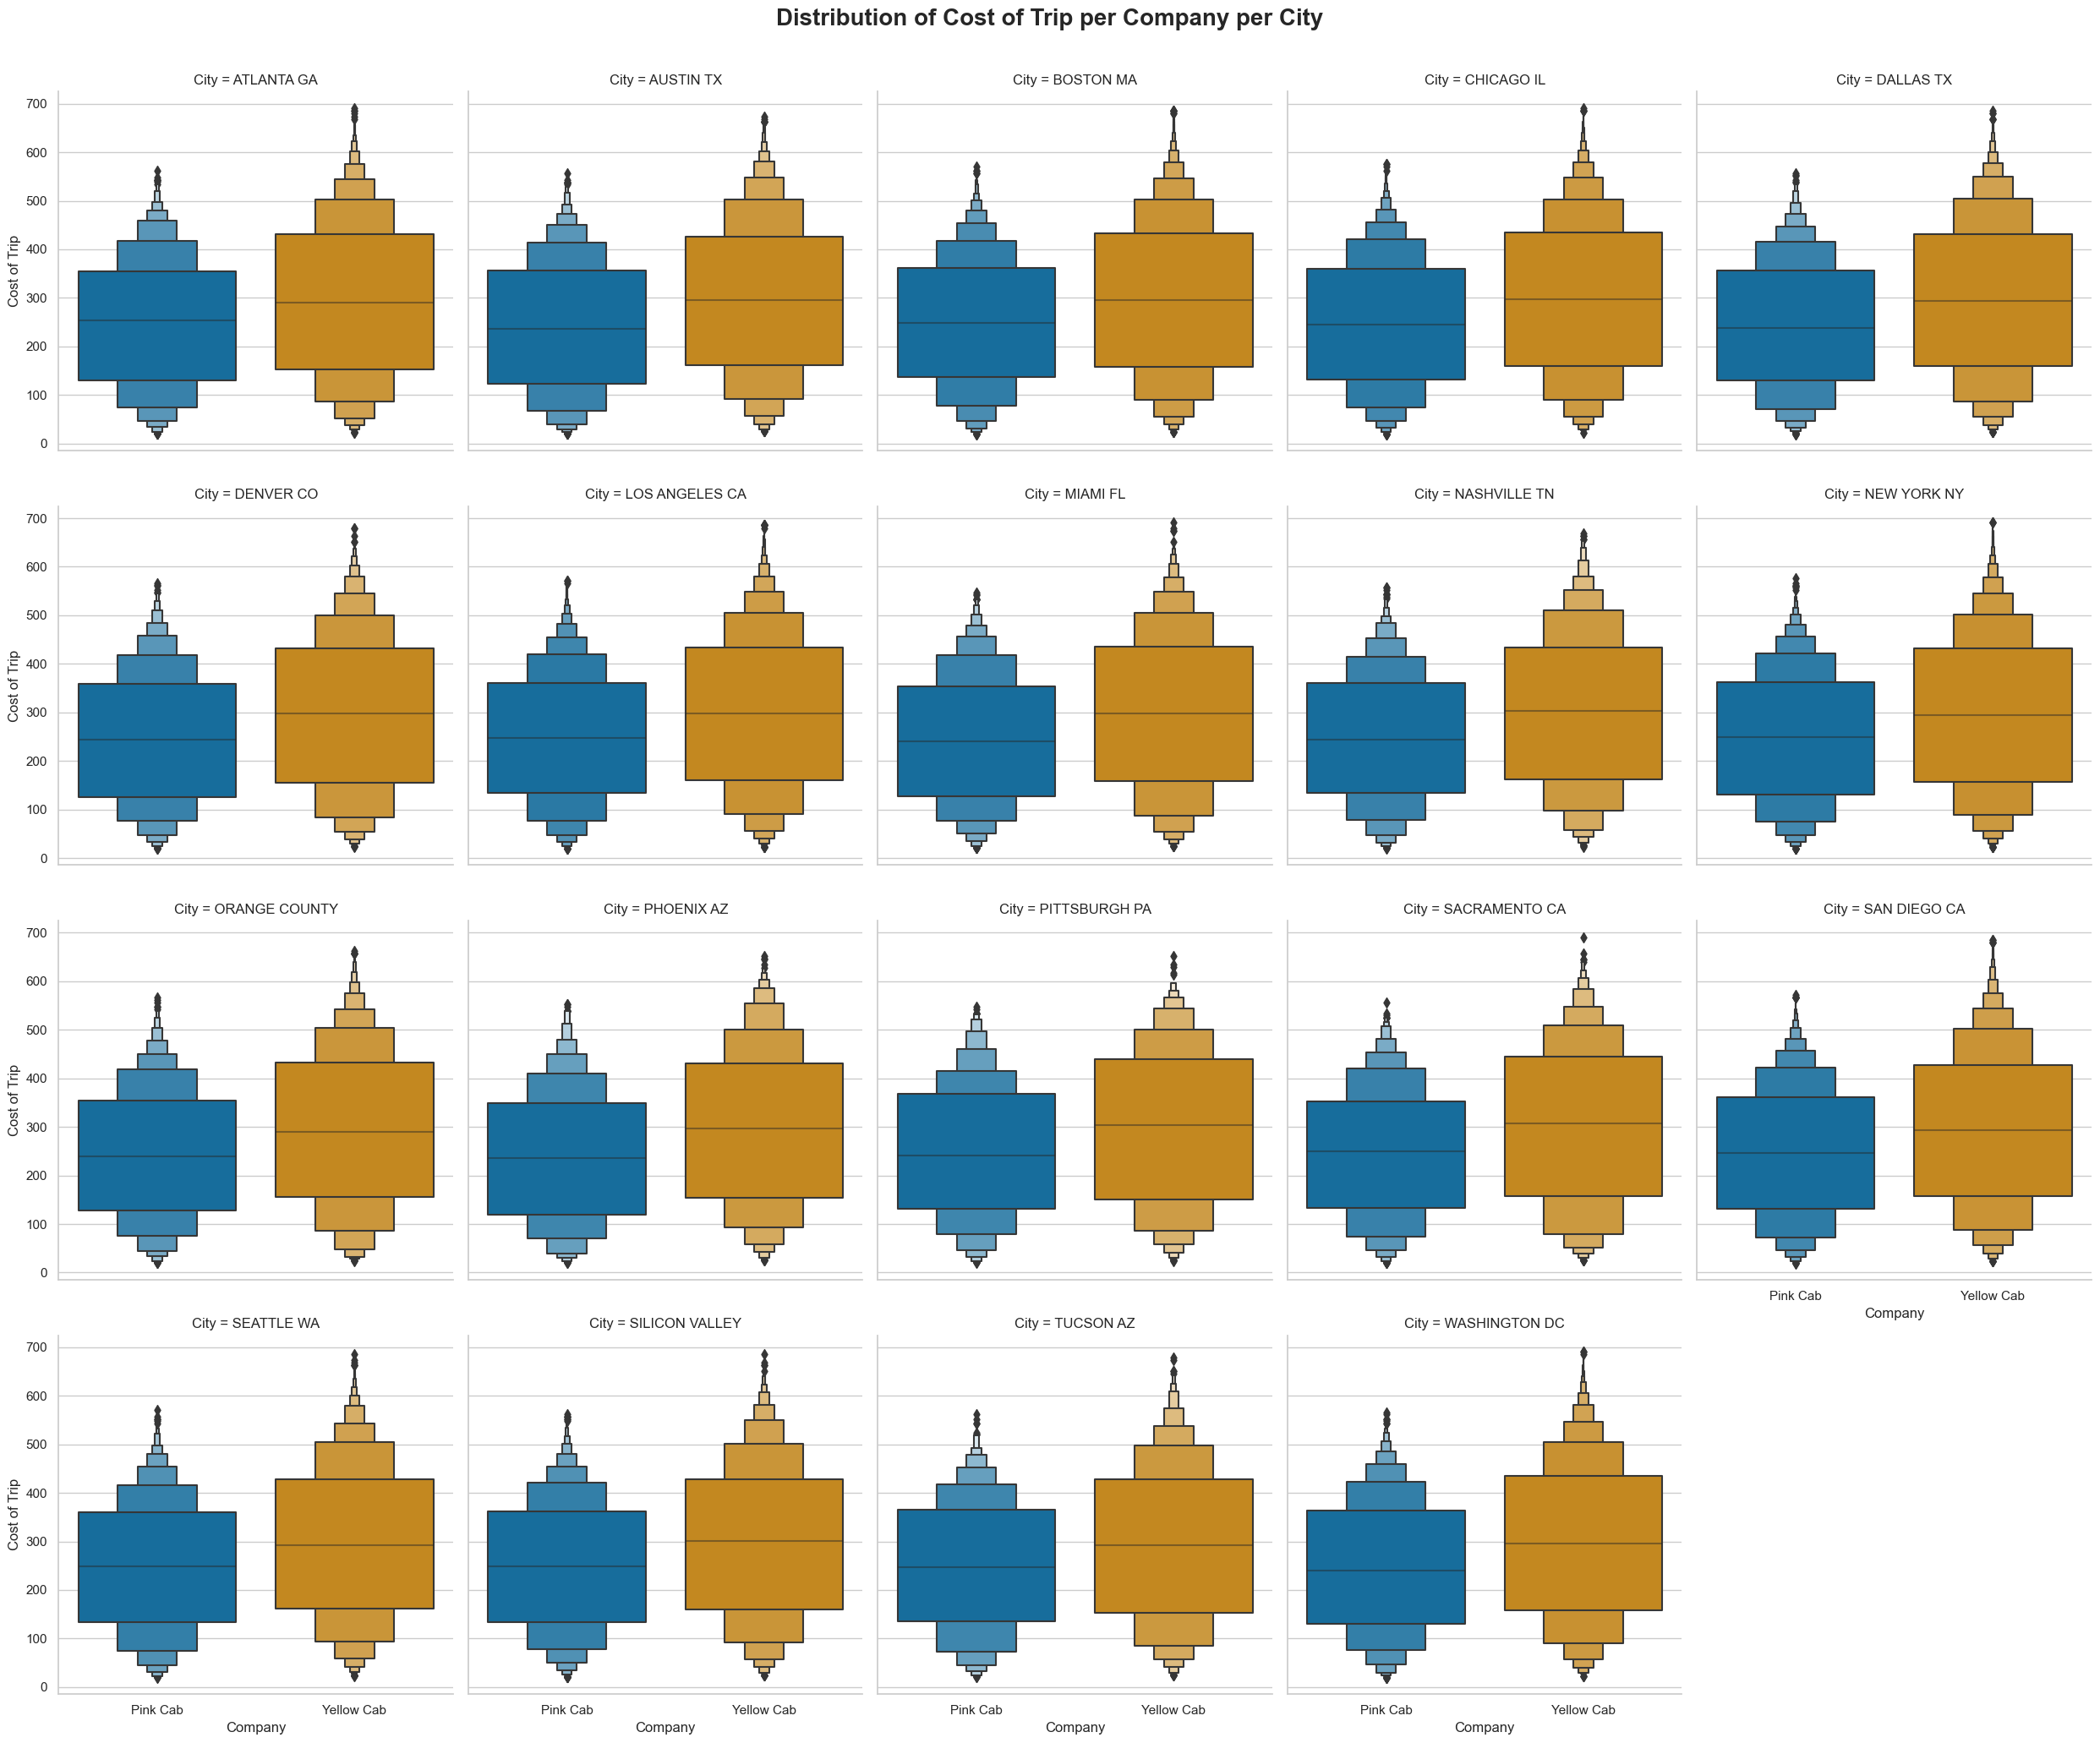

In [61]:
g = sns.catplot(kind='boxen', x='Company', y='Cost of Trip', data=complete_df, col='City', col_wrap=5)
g.fig.suptitle("Distribution of Cost of Trip per Company per City", y=1.03, fontsize=20, fontweight='bold')
plt.show()

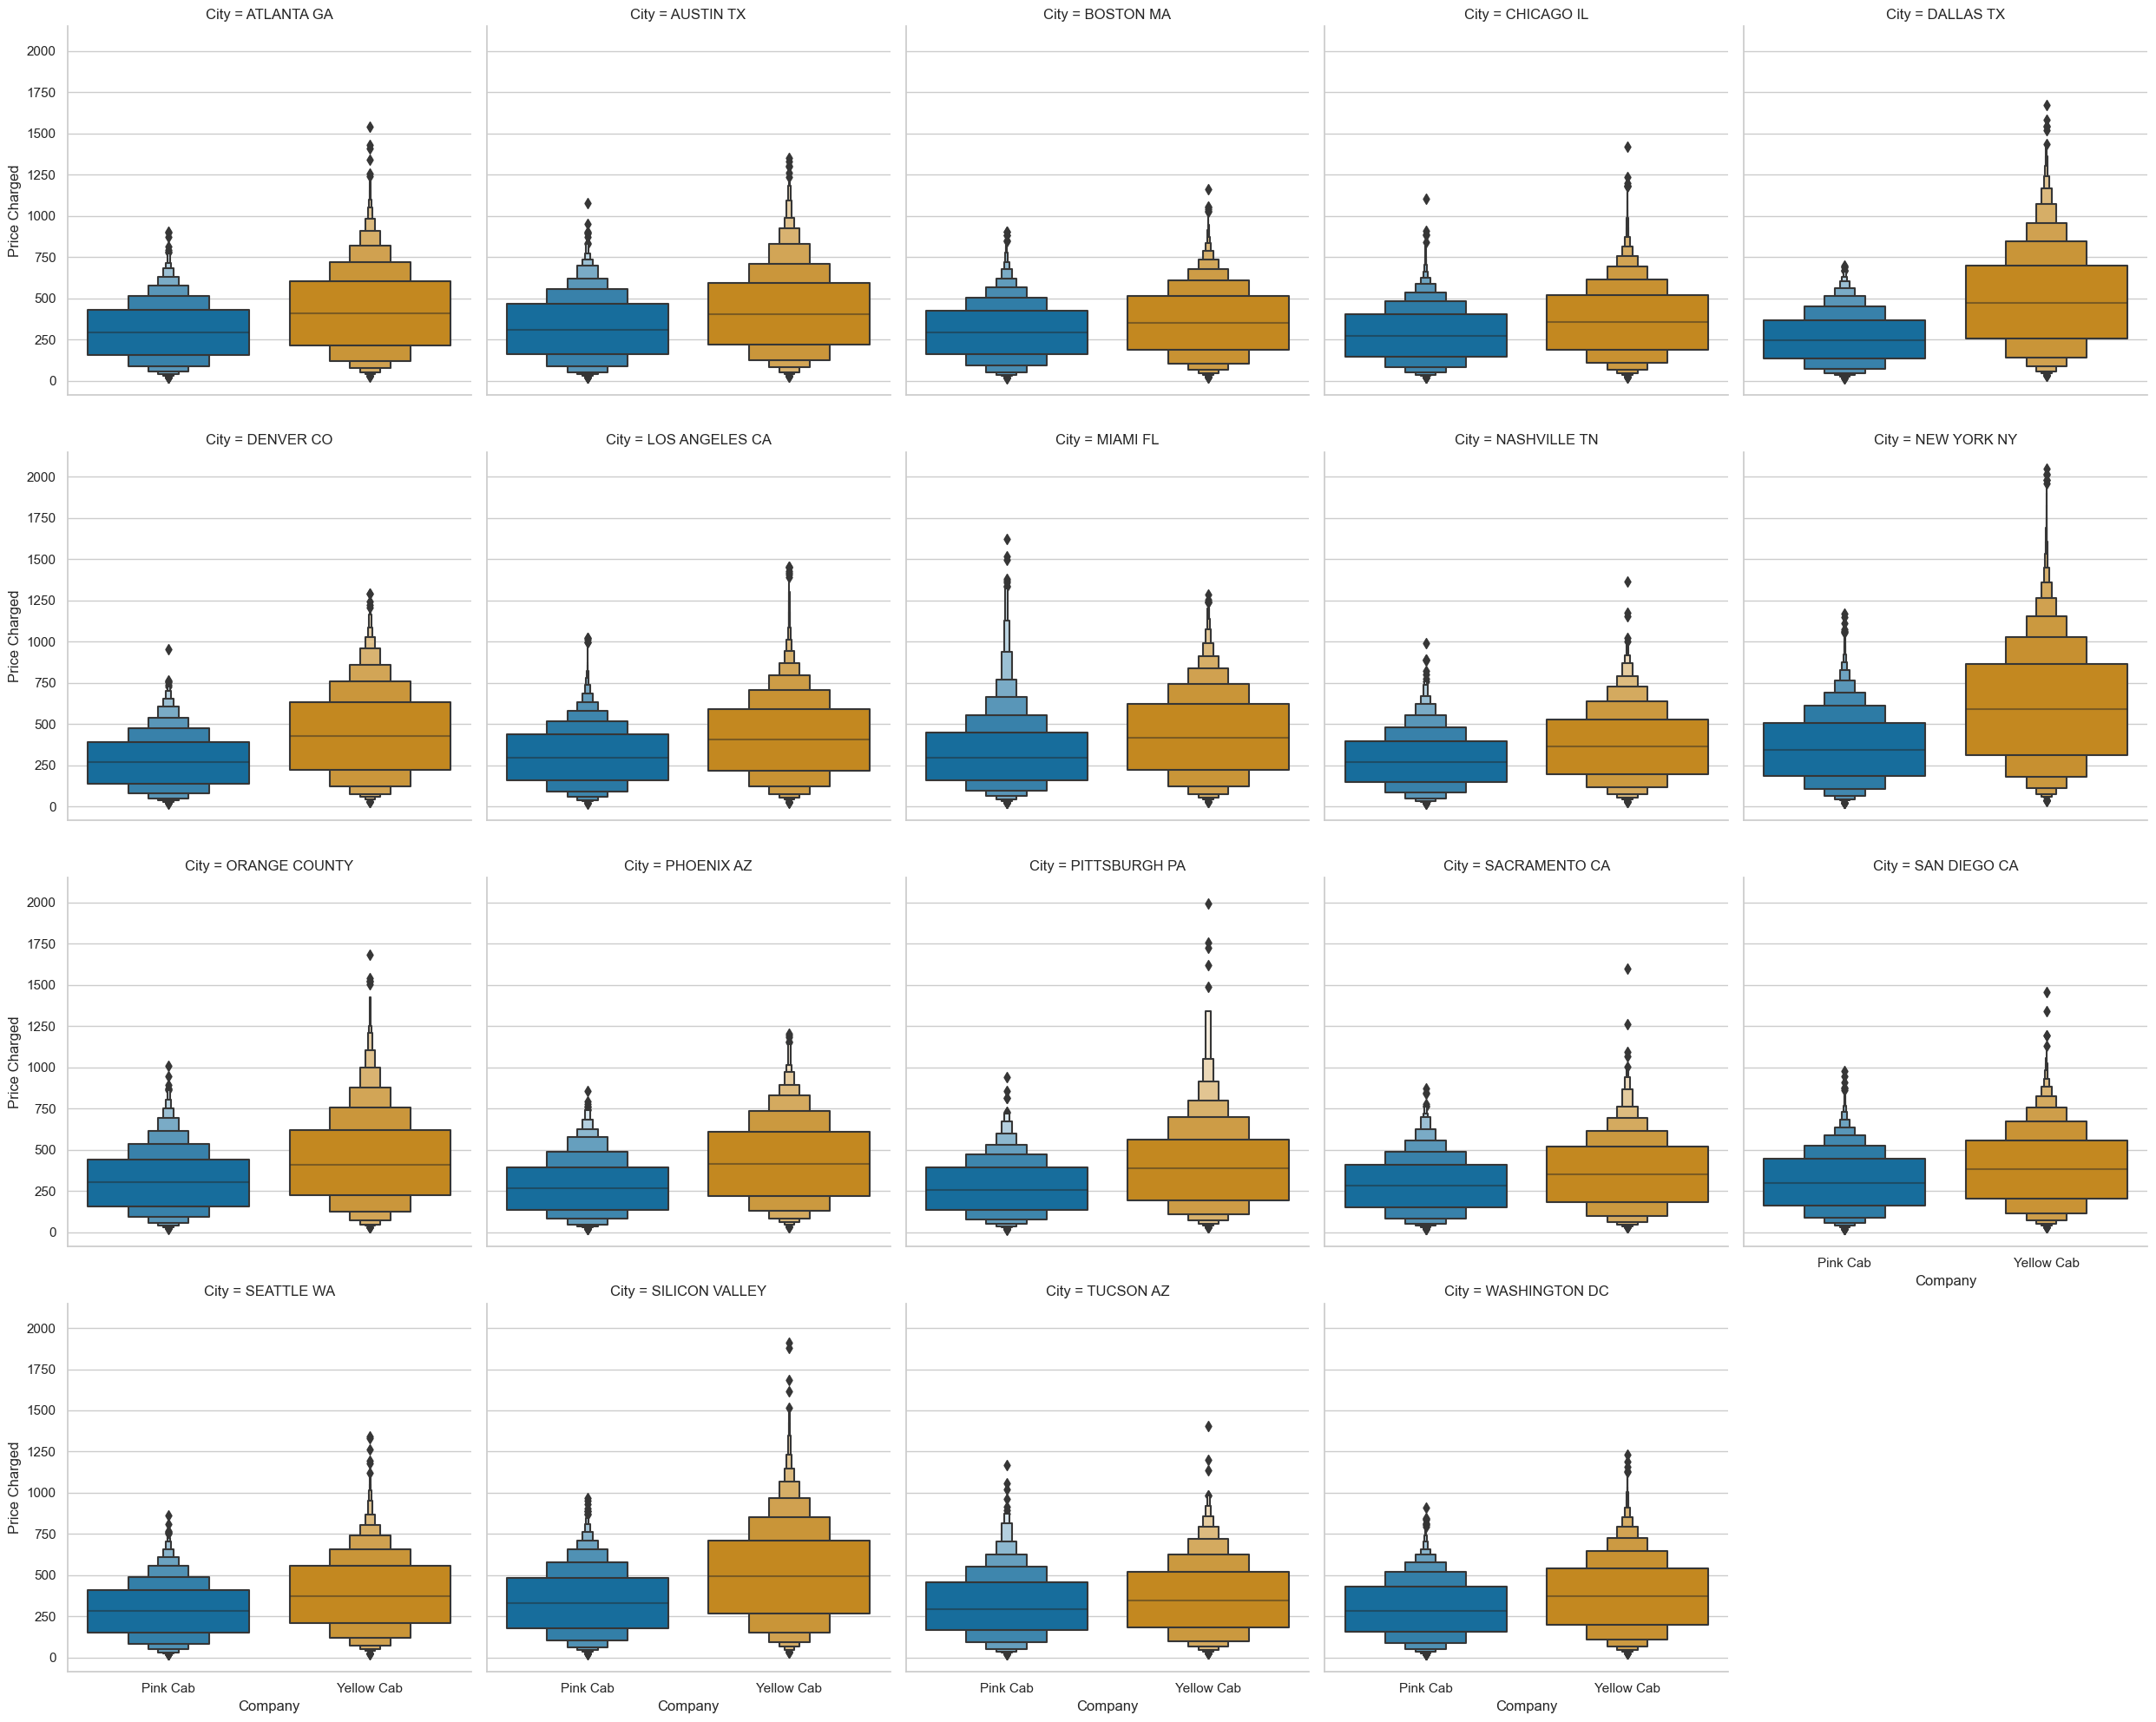

In [60]:
g = sns.catplot(kind='boxen', x='Company', y='Price Charged', data=complete_df, col='City', col_wrap=5)
g.fig.suptitle("Distribution of Price Charged per Company per City", y=1.03, fontsize=20, fontweight='bold')
plt.show()

In [63]:
## Cab data grouped by City and Company
company_per_city = cab_data_df.groupby(['City', 'Company']).agg({'KM Travelled': 'sum', 'Price Charged': 'sum', 'Cost of Trip': 'sum'})
company_per_city.reset_index(inplace=True)
display(company_per_city.describe(), company_per_city)

KM Travelled  Price Charged  Cost of Trip
count        38.000         38.000        38.000
mean     213433.963    4004793.119   2706695.711
std      377228.773    8958614.708   4978103.174
min       14305.100     186785.720    169677.982
25%       30618.982     447897.475    355222.650
50%       65084.625    1095141.315    813542.282
75%      190276.745    2746742.417   2163473.518
max     1932842.470   51966807.310  25515726.539

City     Company  KM Travelled  Price Charged  Cost of Trip
0       ATLANTA GA    Pink Cab     39715.170     532355.800    436305.724
1       ATLANTA GA  Yellow Cab    128928.590    2447885.920   1701503.114
2        AUSTIN TX    Pink Cab     41038.420     598572.710    451127.420
3        AUSTIN TX  Yellow Cab     68168.880    1278569.790    899314.055
4        BOSTON MA    Pink Cab    117933.510    1558660.020   1296658.322
5        BOSTON MA  Yellow Cab    552454.670    8801095.400   7294377.828
6       CHICAGO IL    Pink Cab    210726.130    2636186.140   2317463.652
7       CHICAGO IL  Yellow Cab   1070978.260   17205132.380  14136541.454
8        DALLAS TX    Pink Cab     30389.260     358835.400    334105.288
9        DALLAS TX  Yellow Cab    127392.790    2783594.510   1679591.357
10       DENVER CO    Pink Cab     31308.150     385026.220    344441.281
11       DENVER CO  Yellow Cab     54561.600    1077505.290    720505.220
12  LOS ANGELES CA    Pink Cab    449656.770    6071225.760   4945493.695
13  LOS ANGELES CA  Yellow Cab    639078.880   11724398.650   8438422.069
14        MIAMI FL    Pink Cab     44644.450     652664.630    490363.439
15        MIAMI FL  Yellow Cab    100773.720    1927470.570   1331470.517
16    NASHVILLE TN    Pink Cab     41474.170     519277.050    454992.516
17    NASHVILLE TN  Yellow Cab     26850.570     439831.080    354583.396
18     NEW YORK NY    Pink Cab    315967.270    4987254.360   3475779.972
19     NEW YORK NY  Yellow Cab   1932842.470   51966807.310  25515726.539
20   ORANGE COUNTY    Pink Cab     33608.500     472096.660    370100.827
21   ORANGE COUNTY  Yellow Cab     55218.190    1082776.550    727770.509
22      PHOENIX AZ    Pink Cab     18789.740     242197.740    206601.346
23      PHOENIX AZ  Yellow Cab     27035.340     514484.900    357140.412
24   PITTSBURGH PA    Pink Cab     15400.660     186785.720    169677.982
25   PITTSBURGH PA  Yellow Cab     14305.100     255752.920    187694.701
26   SACRAMENTO CA    Pink Cab     30154.140     387007.820    331683.808
27   SACRAMENTO CA  Yellow Cab     23707.060     374604.130    312601.950
28    SAN DIEGO CA    Pink Cab    240703.870    3286316.400   2648426.631
29    SAN DIEGO CA  Yellow Cab    219799.820    3850064.190   2900790.488
30      SEATTLE WA    Pink Cab     62000.370     795623.690    682842.355
31      SEATTLE WA  Yellow Cab    118903.620    2058692.570   1566789.052
32  SILICON VALLEY    Pink Cab     86540.610    1292411.500    952160.969
33  SILICON VALLEY  Yellow Cab    107172.360    2391690.650   1415235.907
34       TUCSON AZ    Pink Cab     18022.970     258247.630    198958.055
35       TUCSON AZ  Yellow Cab     25206.840     414332.630    333361.510
36   WASHINGTON DC    Pink Cab     82998.950    1107506.080    913739.727
37   WASHINGTON DC  Yellow Cab    906038.710   15259197.750  11960093.941

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14144\4279280393.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(company_per_city['City'], rotation=75)


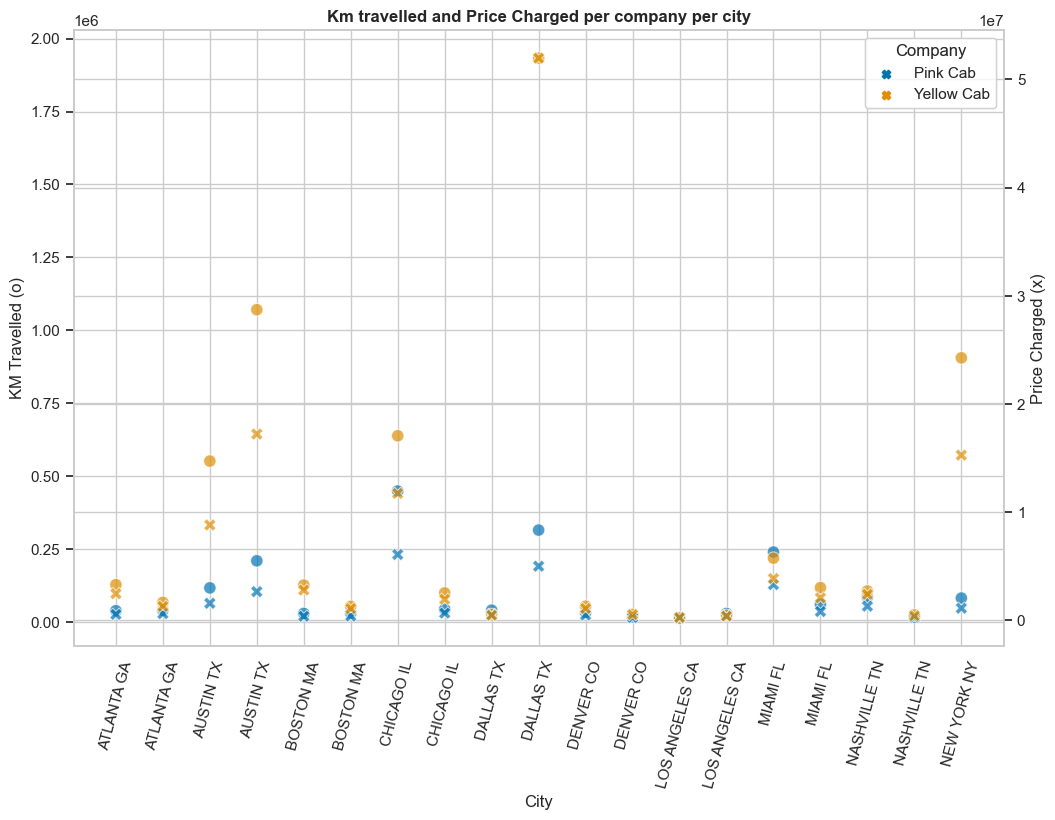

In [64]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(x='City', y='KM Travelled', data=company_per_city, 
                hue='Company', ax=ax1, style='Company', 
                markers={'Pink Cab': 'o', 'Yellow Cab': 'o'}, s=80, alpha=0.7)
ax2 = ax1.twinx()
sns.scatterplot(x='City', y='Price Charged', data=company_per_city, 
                hue='Company', ax=ax2, style='Company', 
                markers={'Pink Cab': 'X', 'Yellow Cab': 'X'}, s=80, alpha=0.7)

ax1.set_xticklabels(company_per_city['City'], rotation=75)
ax1.set_ylabel("KM Travelled (o)")
ax2.set_ylabel("Price Charged (x)")
plt.title("Km travelled and Price Charged per company per city", fontweight='bold')
plt.show()

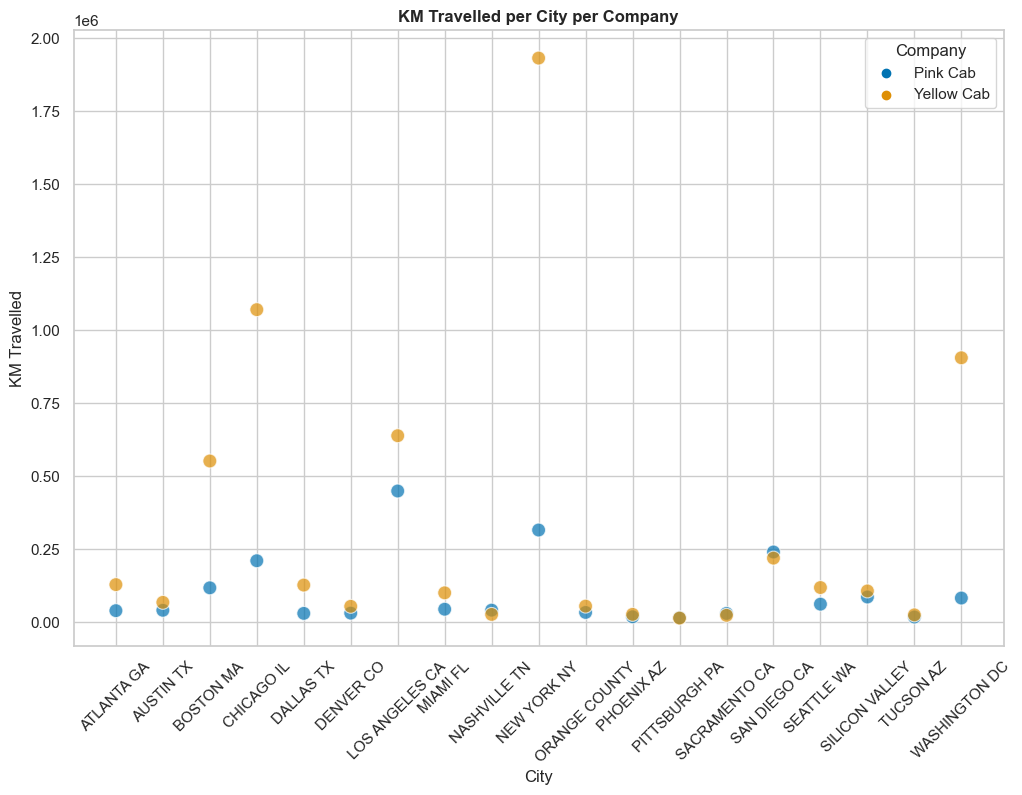

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='City', y='KM Travelled', data=company_per_city, hue='Company', alpha=0.7, s=100)
plt.xticks(rotation=45)
plt.title("KM Travelled per City per Company", fontweight='bold')
plt.show()

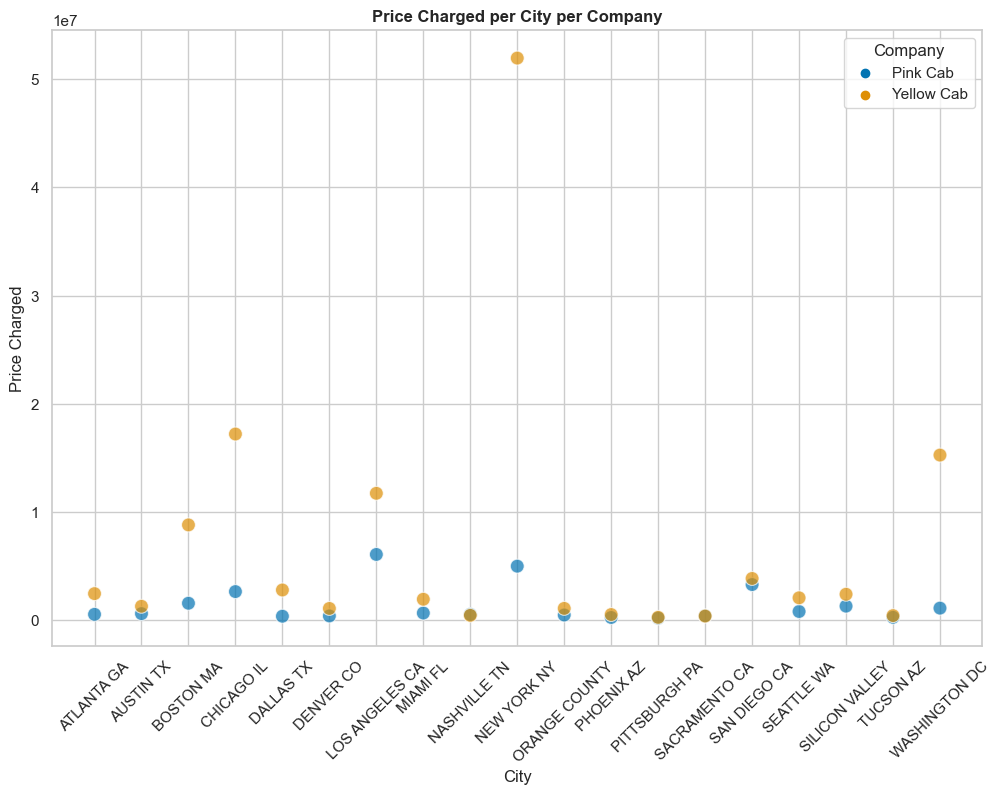

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='City', y='Price Charged', data=company_per_city, hue='Company', alpha=0.7, s=100)
plt.xticks(rotation=45)
plt.title("Price Charged per City per Company", fontweight='bold')
plt.show()

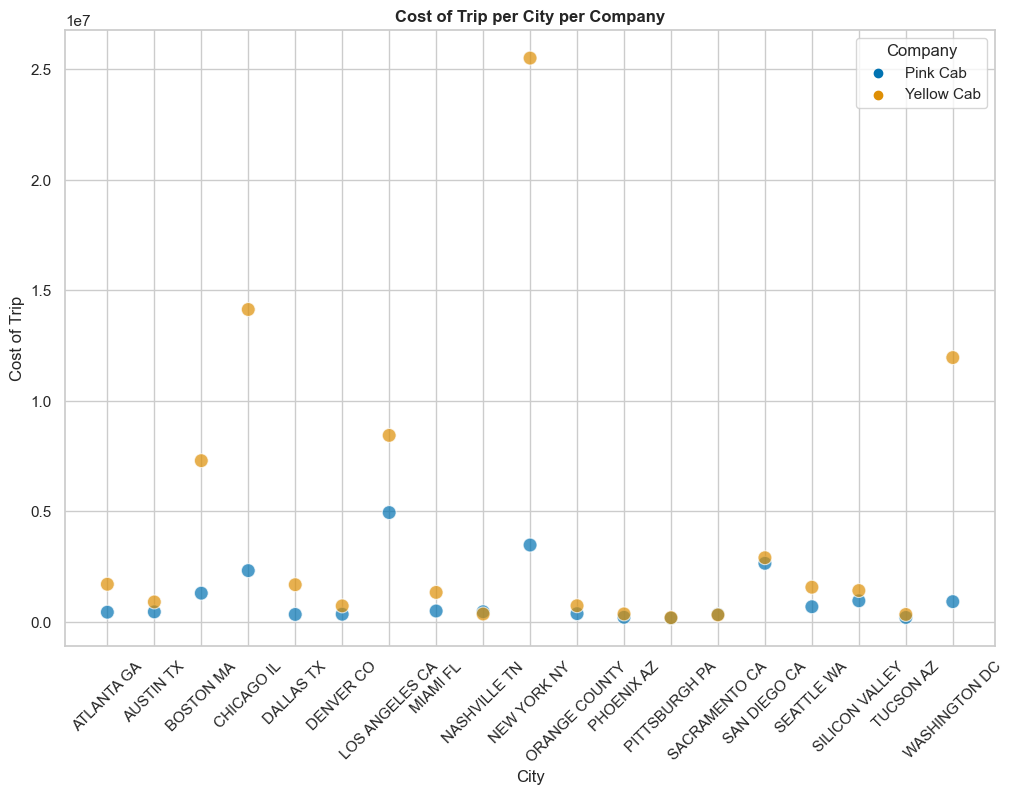

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='City', y='Cost of Trip', data=company_per_city, hue='Company', alpha=0.7, s=100)
plt.xticks(rotation=45)
plt.title("Cost of Trip per City per Company", fontweight='bold')
plt.show()

So far we have seen:
1. Even though the KM Travelled keep a similar distribution in both companies there are differences in the sum of KM Travelled per City where Yellow Cab Company is almost always bigger.
2. The Costs of trips differ a bit in their distributions and there are more outliers in the Yellow Cab Company and that is a good reasson to be bigger in almost all the cities.
3. The Price Charged in Yellow Cab Company is greater or equal in all the cities so it let us know that this Company probably have a better utility.

**Next** we are going to see graphical relations among travels, users age, and users income.

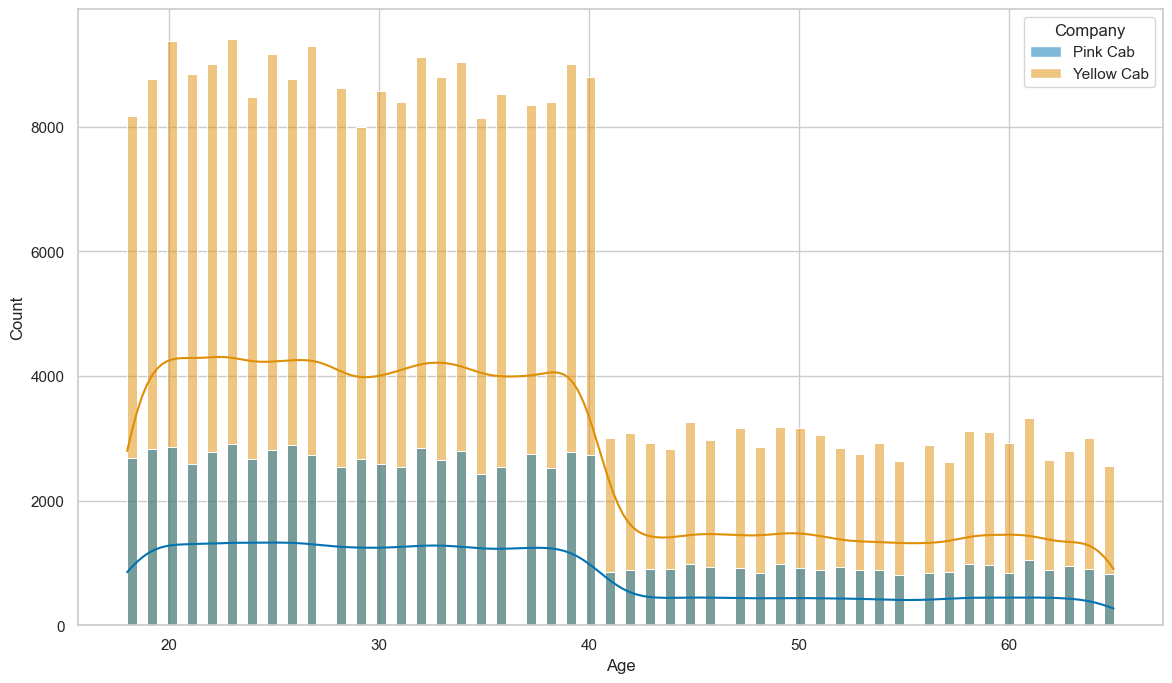

In [56]:
plt.figure(figsize=(14,8))
sns.histplot(x='Age', data=complete_df, hue='Company', kde=True)
plt.show()

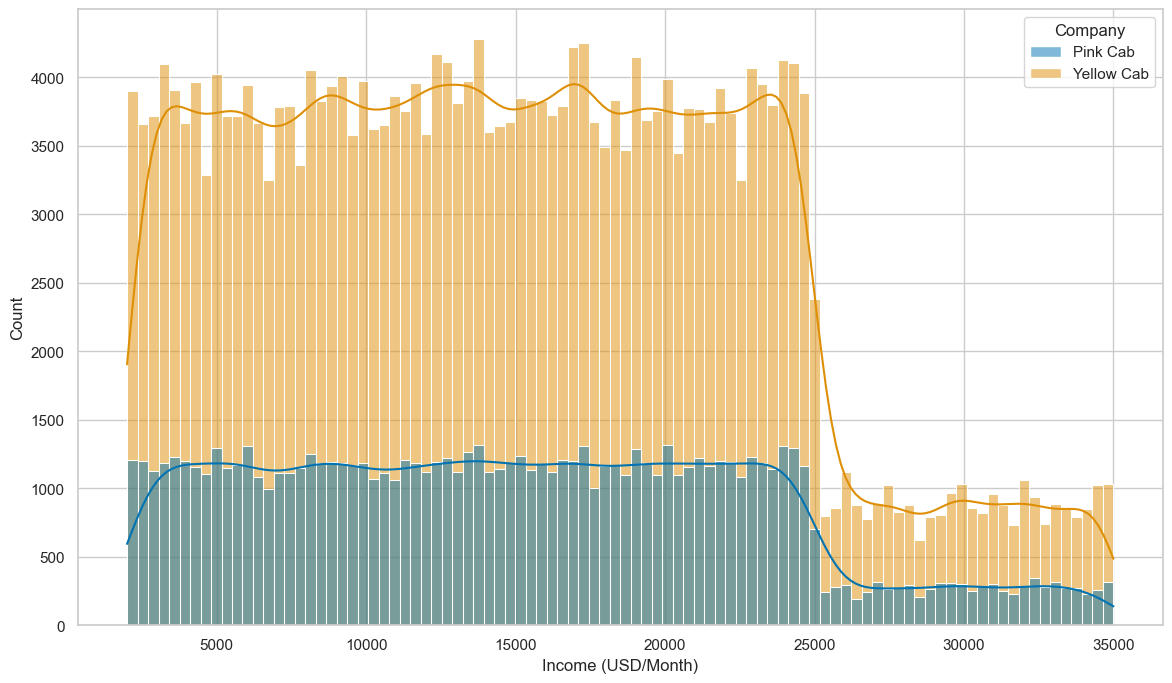

In [68]:
plt.figure(figsize=(14,8))
sns.histplot(x='Income (USD/Month)', data=complete_df, hue='Company', kde=True)
plt.show()

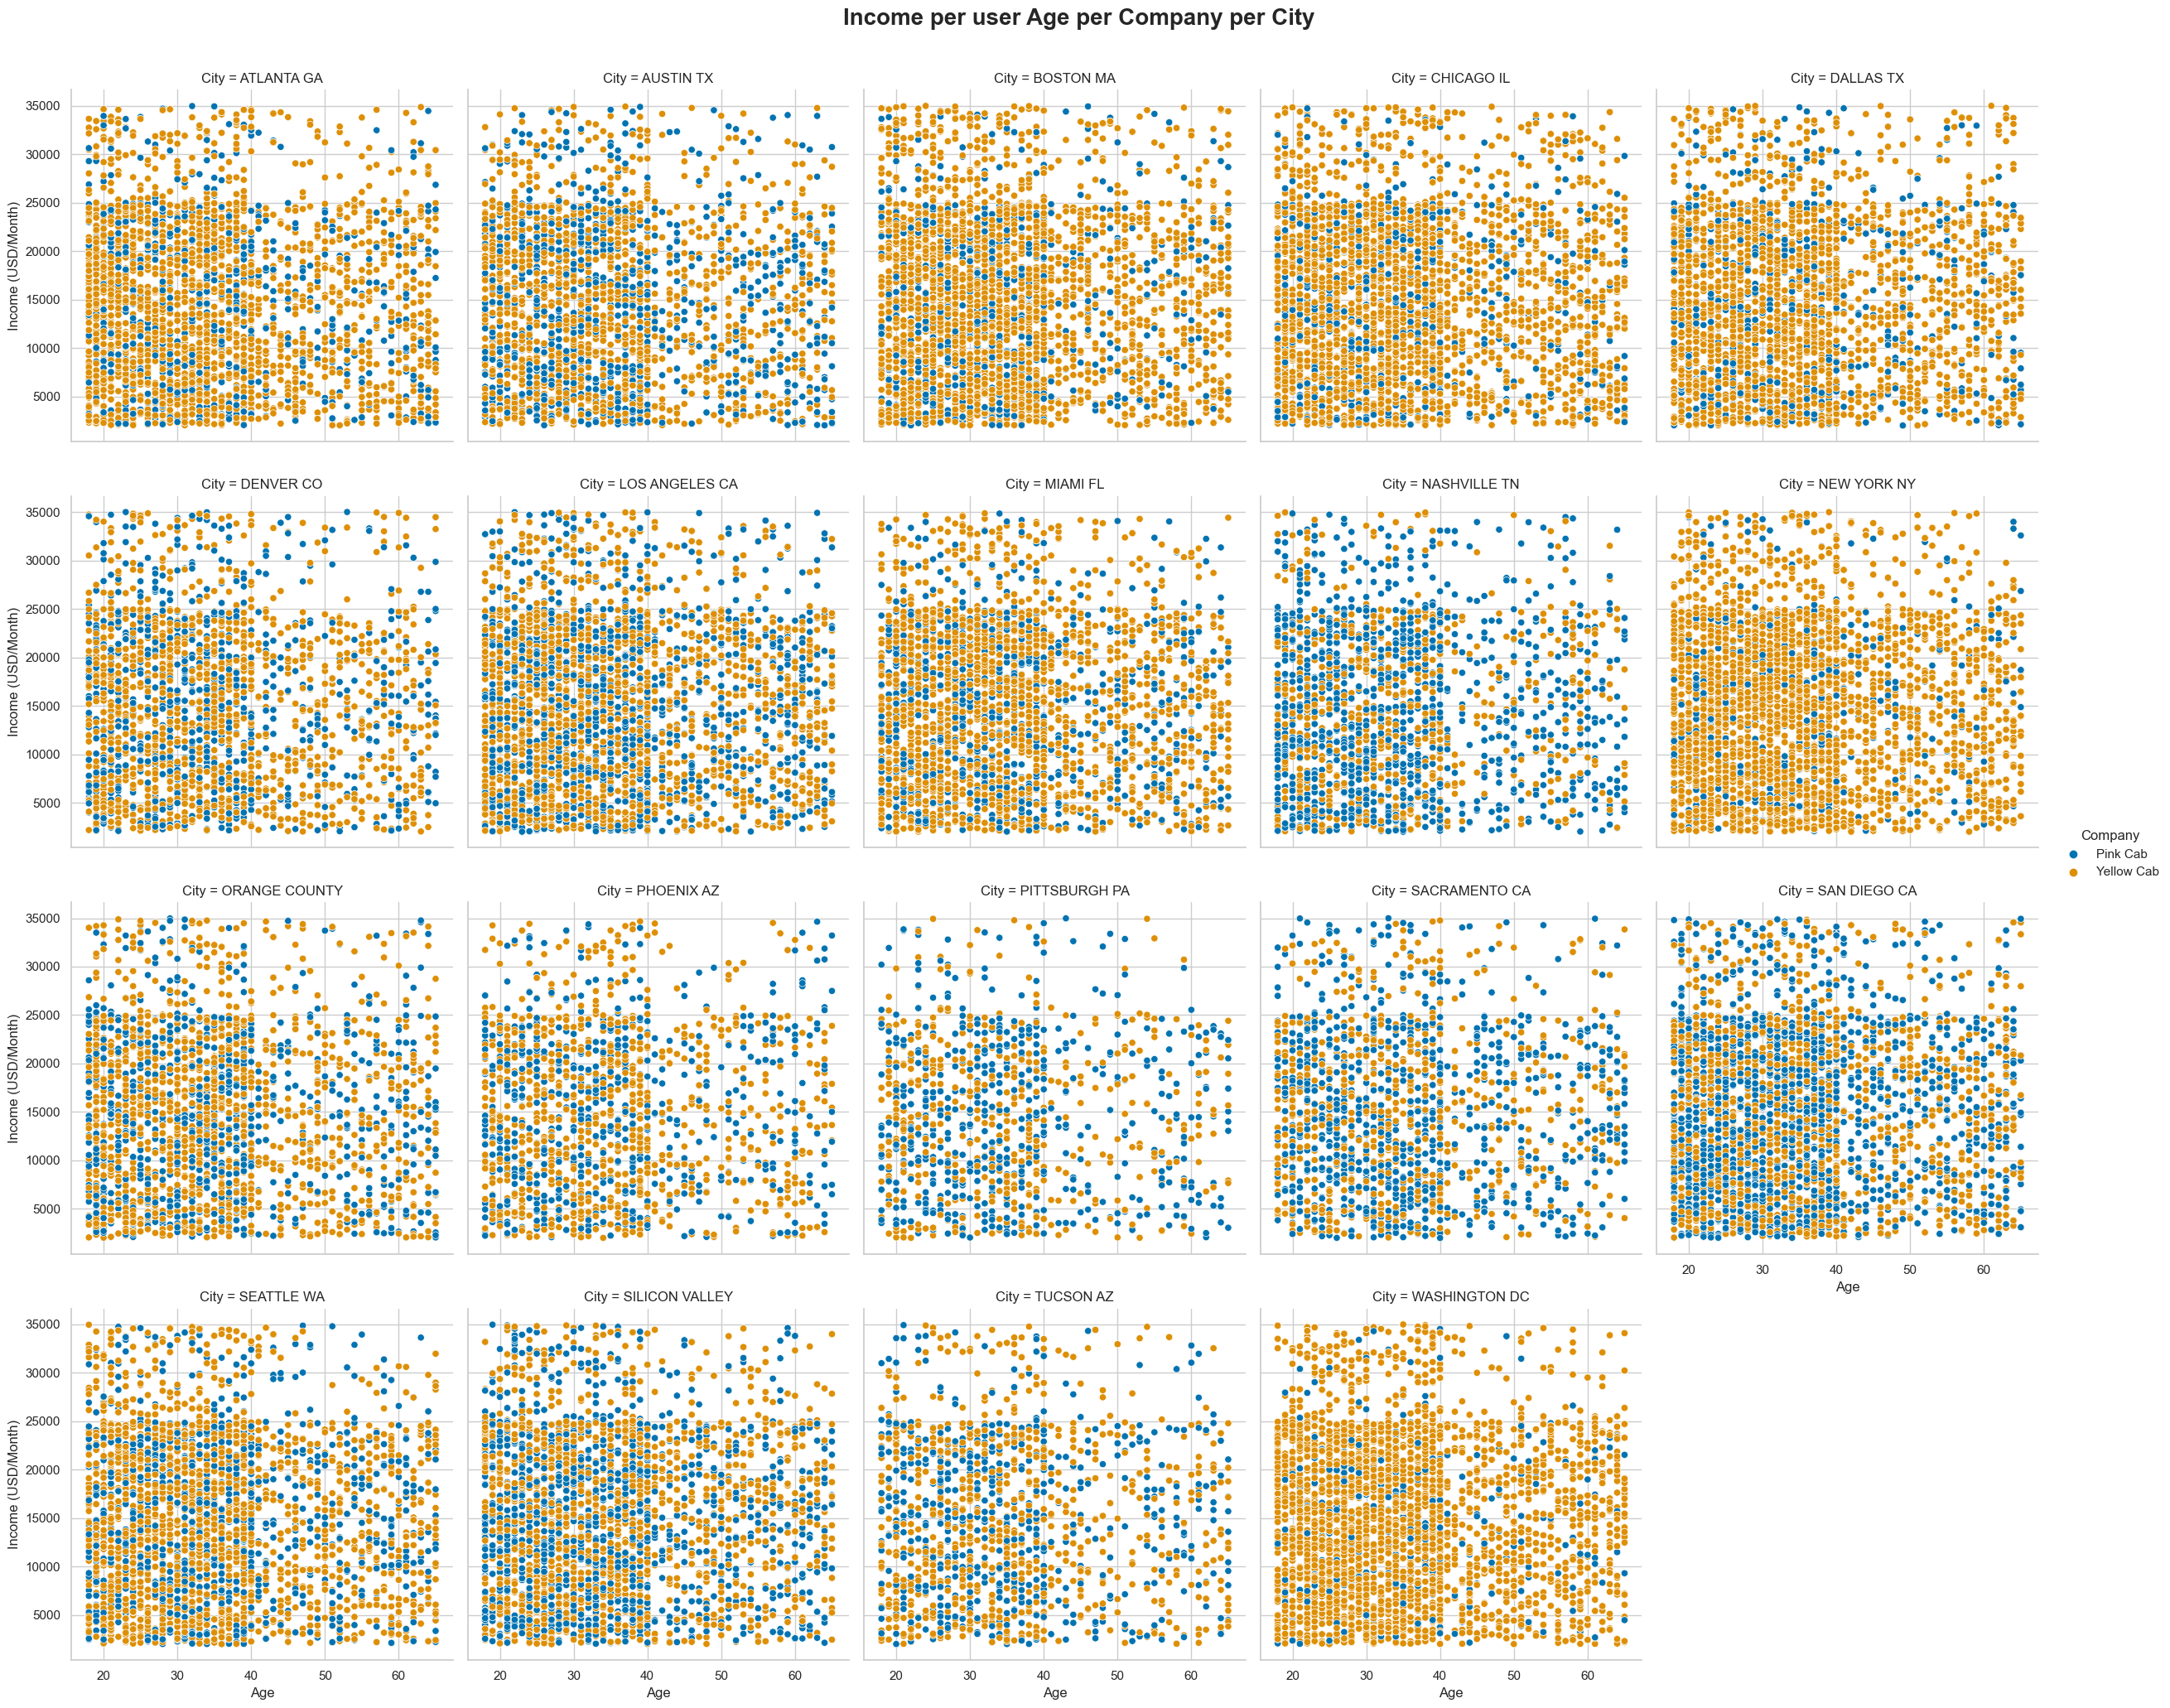

In [76]:
g = sns.relplot(kind='scatter', x='Age', y='Income (USD/Month)', data=complete_df, hue='Company', col='City', col_wrap=5)
g.fig.suptitle("Income per user Age per Company per City", y=1.03, fontsize=20, fontweight='bold')
plt.show()

In [172]:
biggest30_consumers = complete_df.groupby(["Customer ID"]).agg({"Age": np.median, "Income (USD/Month)": np.median, "Transaction ID": "count"}).nlargest(30, "Transaction ID")
biggest30_consumers.reset_index(inplace=True)
biggest30_consumers["Customer ID"] = biggest30_consumers["Customer ID"].astype('str')
biggest30_consumers

Customer ID    Age  Income (USD/Month)  Transaction ID
0          494 18.000           18616.000              54
1         2939 26.000            3589.000              53
2         1070 38.000            7266.000              51
3         2766 29.000            6941.000              51
4          126 18.000           10637.000              50
5          858 40.000           29485.000              50
6          903 60.000            6147.000              50
7          944 24.000           13413.000              50
8         1067 44.000           14989.000              50
9         1628 26.000            5460.000              50
10        1803 38.000           19204.000              50
11        1103 21.000           12800.000              49
12        1360 36.000           12457.000              49
13        2539 20.000           34953.000              49
14        2577 20.000           16895.000              49
15        2895 35.000           16738.000              49
16         205 65.000           18700.000              48
17         336 22.000            8899.000              48
18         442 37.000           18943.000              48
19        1452 54.000            2340.000              48
20        1673 23.000           10393.000              48
21        2776 21.000            9417.000              48
22        2912 26.000           20862.000              48
23          83 22.000           23940.000              47
24         696 20.000           24671.000              47
25         960 29.000           18205.000              47
26         972 20.000            8169.000              47
27         992 61.000           18690.000              47
28        1301 65.000            6135.000              47
29        1315 29.000            2637.000              47

In [173]:
fig = px.bar(biggest30_consumers.sort_values(by='Age'), x="Customer ID", y="Transaction ID", 
             title="Biggest 30 consumers of cab", 
             hover_data=['Age', 'Income (USD/Month)'], color='Age',
             labels={
                      "Customer ID": "Customer ID",
                      "Transaction ID": "Number of Transactions",
                      "Age": "Age of User"
                  },)
fig.show()

If you don't see an interactive bar plot please go to '../outputs/customer_transactions.html' file

**Note:** The only one pattern we can find in these last plots is that the consume of cabs service is mostly concentrated between 18 and 42 years old and till 25000 Income (USD/Month)

### Time graphic analysis


In this part we are going to analyze if there is relation on the consume of cabs service and Holidays

In [44]:
trip_per_day = complete_df.groupby(["Date of Travel", "Company"]).agg({'KM Travelled': 'sum', 'Price Charged': 'sum', 'Cost of Trip': 'sum', 'Age': np.median})
trip_per_day["Cost per KM"] = trip_per_day["Cost of Trip"] / trip_per_day["KM Travelled"]
trip_per_day["Utility"] = trip_per_day["Price Charged"] - trip_per_day["Cost of Trip"]
trip_per_day.reset_index(level="Company", inplace=True)
trip_per_day["Year"] = pd.DatetimeIndex(trip_per_day.index).year
trip_per_day

Company  KM Travelled  Price Charged  Cost of Trip    Age  \
Date of Travel                                                                 
2016-01-02        Pink Cab       814.490      13858.580      9049.159 34.000   
2016-01-02      Yellow Cab      3279.470      88457.390     43161.749 33.500   
2016-01-03        Pink Cab      1342.210      25375.330     14754.748 34.500   
2016-01-03      Yellow Cab      2827.620      75971.250     37521.721 32.000   
2016-01-04        Pink Cab        79.300       1266.070       837.479 29.000   
...                    ...           ...            ...           ...    ...   
2018-12-29      Yellow Cab     14402.060     289551.590    190737.514 34.000   
2018-12-30        Pink Cab      1263.910      17922.820     13903.764 36.000   
2018-12-30      Yellow Cab      4513.790      79426.690     59852.618 34.000   
2018-12-31        Pink Cab      1380.660      19792.740     15348.584 31.500   
2018-12-31      Yellow Cab      4487.530      77075.180     59287.573 33.500   

                Cost per KM   Utility  Year  
Date of Travel                               
2016-01-02           11.110  4809.421  2016  
2016-01-02           13.161 45295.641  2016  
2016-01-03           10.993 10620.582  2016  
2016-01-03           13.270 38449.529  2016  
2016-01-04           10.561   428.591  2016  
...                     ...       ...   ...  
2018-12-29           13.244 98814.076  2018  
2018-12-30           11.001  4019.056  2018  
2018-12-30           13.260 19574.072  2018  
2018-12-31           11.117  4444.156  2018  
2018-12-31           13.212 17787.607  2018  

[2190 rows x 8 columns]

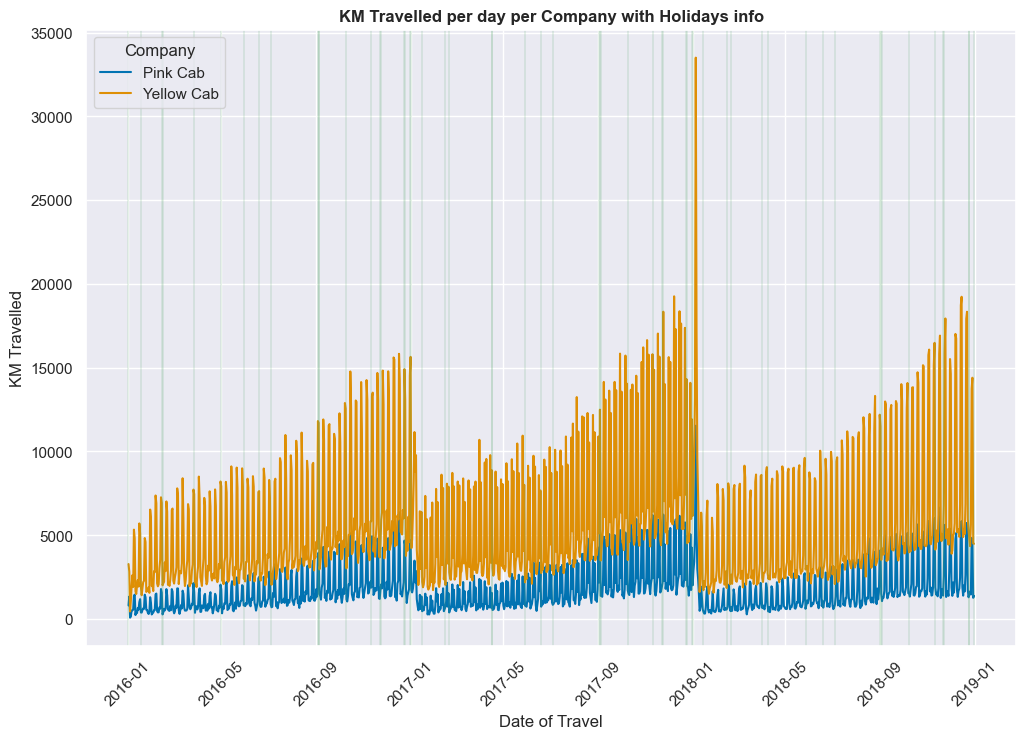

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(x=trip_per_day.index, y="KM Travelled", data=trip_per_day, hue="Company")
for i in range(len(holidays_df)):
    plt.axvline(x=holidays_df["Date"][i], ymin=0, ymax=35000, linestyle='-', linewidth=0.2, color='g')
plt.xticks(rotation=45)
plt.title("KM Travelled per day per Company with Holidays info", fontweight='bold')
plt.show()

We can draw as a firts conclusion that there is a continuous augment on demand of cabs in the first 9 months of the year but from the labor day holiday in September the increase of cabs demand grow faster. Before the Christmas holiday the cabs demand gets the max and it decreases at December 25 and in new year that generally are days of rest.

**<font size=5>What's next?</font>**

Taking into account the above charts we can make asumptions about the data but we need to probe it statisticaly.
The rest of this notebook will draw conclussions after some hypotheses tests.

## First hypothesis
--------------------------

$H_{0}: $ The mean KM Travelled is the same for Yellow Cab and Pink Cab

$H_{A}: $ The mean KM Travelled is not equal for Yellow Cab and Pink Cab

$H_{0}: \bar{\mu}_{Yellow Cab} = \bar{\mu}_{Pink Cab} $ 

$H_{A}: \bar{\mu}_{Yellow Cab} \neq \bar{\mu}_{Pink Cab} $ 

$\alpha = 0.05 $

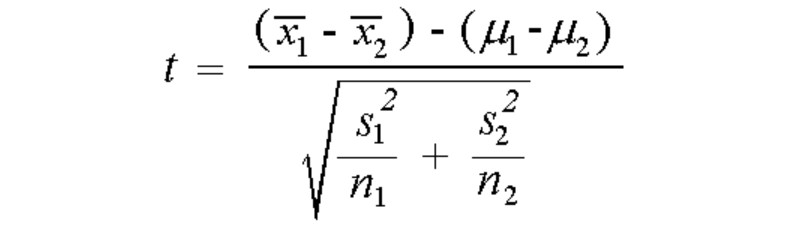

In [121]:
from IPython.display import Image
image_url = 'https://vitalflux.com/wp-content/uploads/2022/01/t-statistics-given-the-population-standard-deviations-are-unequal.jpg'
Image(image_url, width=500, height=200)

In [162]:
def tstat_pvalue(df, column_to_group):
    xbar = df.groupby('Company')[column_to_group].mean()
    s = df.groupby('Company')[column_to_group].std()
    n = df.groupby('Company')[column_to_group].count()
    xbar_pink = xbar['Pink Cab']
    xbar_yellow = xbar['Yellow Cab']
    s_pink = s['Pink Cab']
    s_yellow = s['Yellow Cab']
    n_pink = n['Pink Cab']
    n_yellow = n['Yellow Cab']
    numerator = xbar_yellow - xbar_pink
    denominator = np.sqrt((s_yellow ** 2 / n_yellow) + (s_pink ** 2 / n_pink))
    tstat = numerator / denominator
    degrees_of_freedom = n_pink + n_yellow - 2
    p_value = 1 - t.cdf(tstat, df=degrees_of_freedom)
    
    return {'tstat': '{0:.5f}'.format(tstat), 'p_value': '{0:.5f}'.format(p_value)}

In [163]:
tstat_pvalue(complete_df, 'KM Travelled')

{'tstat': '0.19970', 'p_value': '0.42086'}

***First Hypothesis conclusion: We can't reject the null Hypothesis, the means are the same for both companies***

## Second hypothesis
-------------------------------

$H_{0}: $ The mean Cost of trip is the same for Yellow Cab and Pink Cab

$H_{A}: $ The mean Cost of trip is greater for Yellow Cab compared to Pink Cab

$H_{0}: \bar{\mu}_{Yellow Cab} = \bar{\mu}_{Pink Cab} $ 

$H_{A}: \bar{\mu}_{Yellow Cab} > \bar{\mu}_{Pink Cab} $ 

$\alpha = 0.05 $

In [164]:
tstat_pvalue(complete_df, 'Cost of Trip')

{'tstat': '89.01971', 'p_value': '0.00000'}

***Second Hypothesis conclusion: We can reject the null Hypothesis and accept the alternative hypothesis. The Yellow Cab Cost of Trip is greater compared to Pink Cab***

## Third hypothesis
-------------------------------

$H_{0}: $ The mean Price Charged is the same for Yellow Cab and Pink Cab

$H_{A}: $ The mean Price Charged is greater for Yellow Cab compared to Pink Cab

$H_{0}: \bar{\mu}_{Yellow Cab} = \bar{\mu}_{Pink Cab} $ 

$H_{A}: \bar{\mu}_{Yellow Cab} > \bar{\mu}_{Pink Cab} $ 

$\alpha = 0.05 $

In [165]:
tstat_pvalue(complete_df, 'Price Charged')

{'tstat': '176.94202', 'p_value': '0.00000'}

***Third Hypothesis conclusion: We can reject the null Hypothesis and accept the alternative hypothesis. The Yellow Cab Price Charged is greater compared to Pink Cab***

This first analysis let us see that the both companies have similar behaviors in distance per cab but cost and prices are greater in the Yellow Cab Company. This means that we can invest our money in Yellow Cab Company and bigger utility compared with the utility in Pink Cab. In the other side we can make a long-term invesment in Pink Cab Company with the purpose of improve the service and increase the utility.